In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
import math

In [128]:
data = pd.read_csv('Absenties.csv', delimiter=';')

In [150]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))
    
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

def _median_odd(xs: List[float]):
    return sorted(xs)[len(xs)//2]

def _median_even(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint -1]+ sorted_xs[hi_midpoint])/2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    assert len(xs) >= 2, 'variance requires at least two elements'
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)


def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys)
    return dot(de_mean(xs), de_mean(ys))/(len(xs)-1)

def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys)/ stdev_x/stdev_y
    else:
        return 0
        
def quantile(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

def iqr(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)


def checkoutlier(xs: List[float]) -> Tuple:
    iqr1 = 1.5* (iqr(xs))
    q1 = (quantile(xs, 0.25)) - iqr1
    q2 = (quantile(xs, 0.75)) + iqr1
    return q1,q2


In [154]:
print("Correlation between distance and transport exp");print()
print(correlation(distance, transport_exp));print()

print(checkoutlier(distance));print()
print(checkoutlier(transport_exp));print()

Correlation between distance and transport exp

0.26218311063190686

(-35.0, 101.0)

(57.5, 381.5)



In [182]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,transportation_exp,distance_work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [222]:
distance = list(data.distance_work)
transport_exp = list(data.transportation_exp)

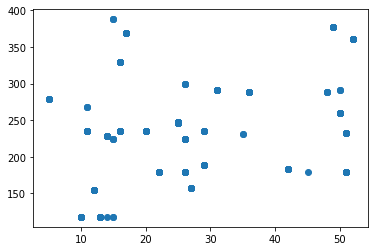

In [132]:
plt.scatter(distance, transport_exp)

In [281]:
out_tranExp = [transport_exp.index(i)
               for i in transport_exp
               if i >= 380]


print(out_tranExp)

good_dis = [dis
           for i, dis in enumerate(distance)
           if i != out_tranExp]

good_trans_exp = [trans
            for i, trans in enumerate(transport_exp)
            if i != out_tranExp]

print(len(transport_exp))
print(len(good_trans_exp))
assert (len(good_dis)==len(good_trans_exp))

[144, 144, 144]
740
740


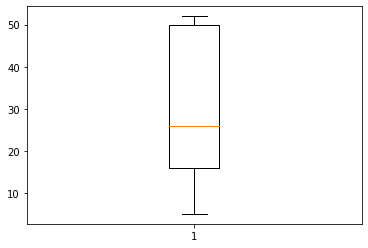

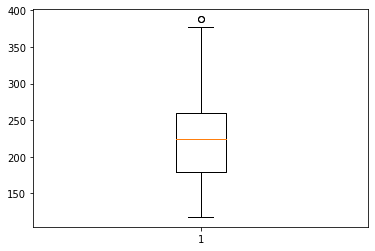

388
378
378
388
378
378
378
378
378
378


(57.5, 381.5)

In [280]:
plt.boxplot(good_dis)
plt.show()
plt.boxplot(good_trans_exp)
plt.show()